In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

# Exploratory data analysis

In [3]:
data = pd.read_csv("data/cleaned_data_03-03-2025.csv")

In [4]:
data.head()

,title,price,manufacturing_year,mileage,color,fuel,hp,type,region,url,is_amg
0,mercedes-benz gle 450amg coupe дистроник камер...,69990,2016,153000,черен,бензинов,367.0,купе,софия,https://www.mobile.bg/obiava-21739610929678661...,1
1,mercedes-benz gle 350d coupe-amg line-9g-troni...,69999,2017,189000,бял,дизелов,258.0,купе,пазарджик,https://www.mobile.bg/obiava-21732691514860984...,1
2,mercedes-benz gle 43 amg coupe панорама дистр....,78990,2017,127000,син,бензинов,367.0,купе,софия,https://www.mobile.bg/obiava-11737682127414901...,1
3,mercedes-benz gle 250 d,45500,2015,178000,черен,дизелов,204.0,джип,пловдив,https://www.mobile.bg/obiava-21705057744409616...,0
4,mercedes-benz gle 350 4matic amg * топ състояние*,46000,2016,251700,сив,бензинов,307.0,джип,софия,https://www.mobile.bg/obiava-21725807501288193...,1


In [5]:
data.shape

(763, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763 entries, 0 to 762
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               763 non-null    object 
 1   price               763 non-null    int64  
 2   manufacturing_year  763 non-null    int64  
 3   mileage             763 non-null    int64  
 4   color               763 non-null    object 
 5   fuel                763 non-null    object 
 6   hp                  763 non-null    float64
 7   type                763 non-null    object 
 8   region              763 non-null    object 
 9   url                 763 non-null    object 
 10  is_amg              763 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 65.7+ KB


### Descriptive statistics:

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,763.0,111765.597641,51095.032255,7777.0,68750.0,99000.0,149700.0,252840.0
manufacturing_year,763.0,2019.245085,2.806341,2015.0,2017.0,2019.0,2021.0,2025.0
mileage,763.0,114174.951507,72784.628004,10.0,49500.0,113000.0,177529.0,475000.0
hp,763.0,348.842726,105.245402,194.0,258.0,330.0,390.0,639.0
is_amg,763.0,0.698558,0.459185,0.0,0.0,1.0,1.0,1.0


### Check distributions of all numerical features

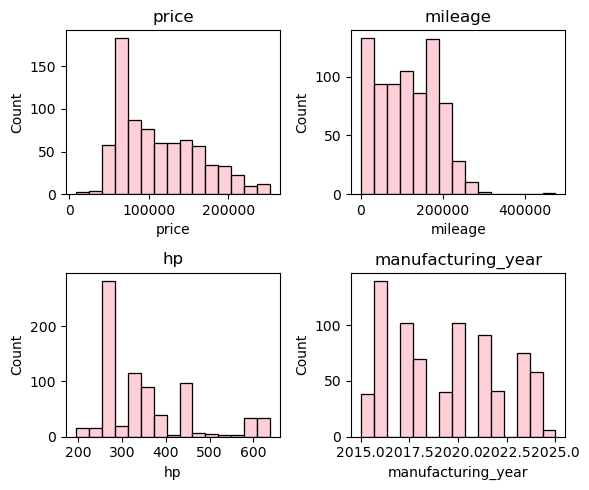

In [8]:
numerical_features = ["price", "mileage", "hp", "manufacturing_year"]

plt.figure(figsize = (6, 5))
for feature in numerical_features:
    plt.subplot(2, 2, numerical_features.index(feature) + 1)
    sns.histplot(data = data[feature], bins = 15, color = "pink")
    plt.title(feature)
plt.tight_layout()
plt.show()

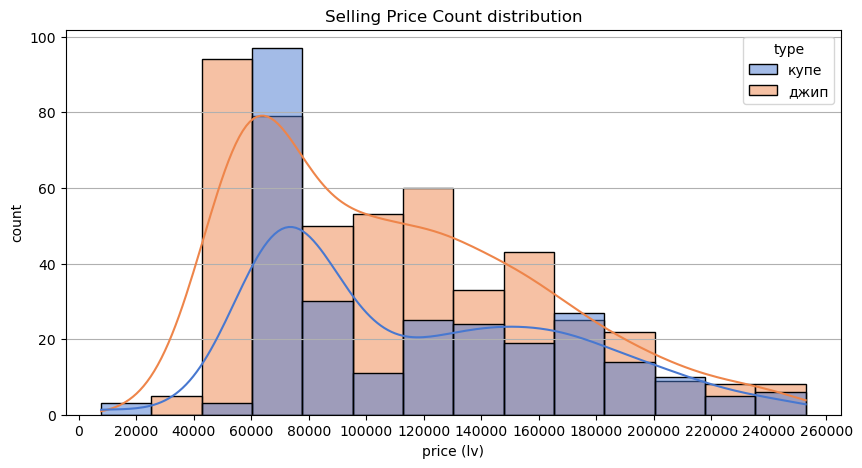

In [8]:
plt.figure(figsize = (10, 5))
sns.histplot(data = data, x = "price", kde = True, hue = "type", palette = "muted")

plt.title("Distribution of prices for each type of car: jeep and coupe")
plt.xlabel("price (lv)")
plt.xticks(np.arange(0, 261_000, 20_000))
plt.ylabel("count")
plt.title('Selling Price Count distribution')
plt.grid(axis = "y")
plt.show()

In [9]:
data.price.skew()

0.6632382343752441

Prices have positively skewed distribution.

In [11]:
data[data.price < 20000]

,title,price,manufacturing_year,mileage,color,fuel,hp,type,region,url,is_amg
253,mercedes-benz gle 350 coupe 350/4-matic/63amg/...,7777,2018,175000,черен,дизелов,258.0,купе,пазарджик,https://www.mobile.bg/obiava-21695141064528167...,1
684,mercedes-benz gle 63 s amg coupe/63amg/9g-tronic/,7777,2015,115000,бял,бензинов,585.0,купе,пазарджик,https://www.mobile.bg/obiava-21697244015093712...,1
724,mercedes-benz gle coupe coupe 350/4-matic/63am...,7777,2018,175000,черен,дизелов,258.0,купе,пазарджик,https://www.mobile.bg/obiava-21695141409556940...,1


These records are outliers and i remove them:

In [10]:
data = data.drop(data[data.price < 20000].index)

I check the average price for each manufacturing year:

In [11]:
mean_price_by_year = pd.DataFrame(data.groupby("manufacturing_year")["price"].mean())
mean_price_by_year

,price
manufacturing_year,
2015,69337.027027
2016,68522.950000
2017,69876.362745
2018,68197.132353
2019,99859.175000
2020,121639.990196
2021,139367.802198
2022,152616.268293
2023,182843.333333


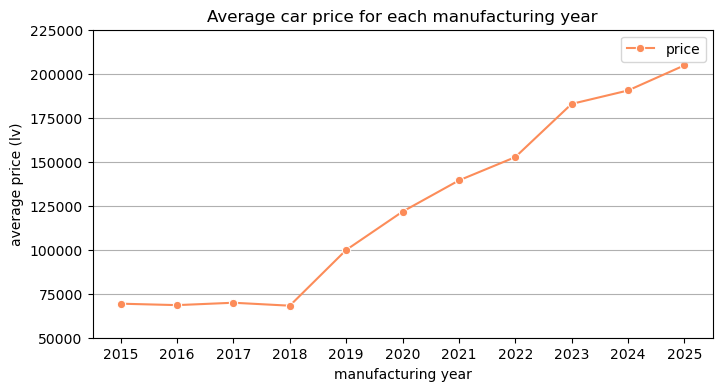

In [12]:
plt.figure(figsize = (8, 4))
sns.lineplot(mean_price_by_year, marker = "o", palette = "OrRd")

plt.title("Average car price for each manufacturing year")
plt.xlabel("manufacturing year")
plt.xticks(np.arange(2015, 2026, 1))
plt.ylabel("average price (lv)")
plt.yticks(np.arange(50000, 250_000, 25000))
plt.grid(axis = "y")
plt.show()

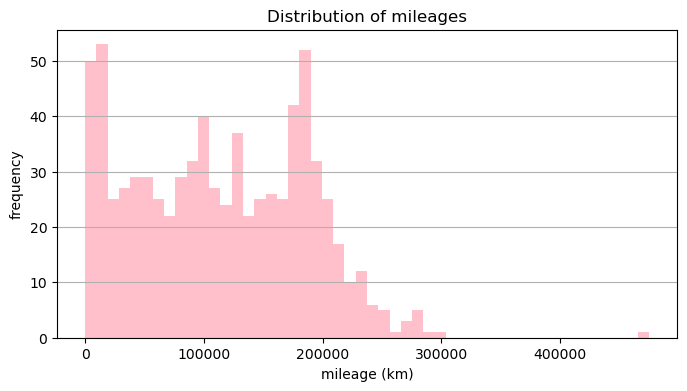

In [15]:
plt.figure(figsize = (8, 4))
plt.hist(data.mileage, bins = 50, color = "pink")

plt.title("Distribution of mileages")
plt.xlabel("mileage (km)")
plt.ylabel("frequency")
plt.grid(axis = "y")
plt.show()

In [13]:
data[data.mileage > 400000]

,title,price,manufacturing_year,mileage,color,fuel,hp,type,region,url,is_amg
337,mercedes-benz gle 350 купе amg line,71000,2017,475000,черен,дизелов,258.0,купе,бургас,https://www.mobile.bg/obiava-21732521479510702...,1


In [14]:
data[data.mileage < 100]

,title,price,manufacturing_year,mileage,color,fuel,hp,type,region,url,is_amg
192,mercedes-benz gle 53 4matic + coupe amg facelift,195999,2025,70,син,бензинов,455.0,купе,софия,https://www.mobile.bg/obiava-21688199304356117...,1
247,mercedes-benz gle coupe 300d 4 matic amg burma...,191670,2025,30,зелен,дизелов,292.0,купе,софия,https://www.mobile.bg/obiava-21736346724359643...,1
567,mercedes-benz gle 450 4m amg-line burmseter* p...,186200,2024,10,черен,хибриден,381.0,джип,пловдив,https://www.mobile.bg/obiava-11723102972320863...,1
591,mercedes-benz gle 450 amg d coupe/ amg/ 4matic,176398,2023,20,сив,дизелов,367.0,купе,софия,https://www.mobile.bg/obiava-11721914524115979...,1
647,mercedes-benz gle 53 4matic + coupe amg facelift,195999,2025,60,черен,бензинов,455.0,купе,софия,https://www.mobile.bg/obiava-21688164461467794...,1
655,mercedes-benz gle 53 4matic 4matic + coupe amg...,203500,2024,30,син,бензинов,455.0,купе,софия,https://www.mobile.bg/obiava-21738571358239166...,1
660,mercedes-benz gle 53 4matic coupe,215208,2025,10,сив,бензинов,435.0,купе,софия,https://www.mobile.bg/obiava-21740153067608913...,0
667,mercedes-benz gle 53 4matic + amg facelift 7ме...,235004,2023,50,сив,хибриден,455.0,джип,стара загора,https://www.mobile.bg/obiava-21682864729517829...,1


The above cars have low mileage values ​​because they are new. They are not outliers.

In [15]:
data.color.value_counts()

color
черен         319
бял           185
сив            85
тъмно сив      57
син            44
червен         20
светло сив     13
сребърен       12
зелен          11
кафяв           8
металик         3
бежов           2
хамелеон        1
Name: count, dtype: int64

With mapping_dict i translate the colors from Bulgarian to English and map them to their real colors in hex:

In [16]:
color_mapping = {
    "черен": ["black", "#000000"], 
    "бял": ["white", "#FFFFFF"],  
    "син": ["blue", "#0970b5"],  
    "сив": ["gray", "#8d9094"], 
    "сребърен": ["silver", "#C0C0C0"], 
    "кафяв": ["brown", "#5e4545"], 
    "светло сив": ["light gray", "#D3D3D3"],  
    "тъмно сив": ["dark gray", "#656a6e"], 
    "зелен": ["green", "#008000"], 
    "червен": ["red", "#a80d0d"], 
    "бежов": ["beige", "#e6e1d5"], 
    "металик": ["metallic", "#B0C4DE"],  
    "хамелеон": ["chameleon", "#753a90"],
}

data["color_en"] = data["color"].map(lambda x: color_mapping.get(x, ["unknown", "#808080"])[0])

Check the average price for each color:

In [17]:
color_mean_price = pd.DataFrame(data.groupby("color")["price"].mean().sort_values(ascending = False)).reset_index()
color_mean_price

,color,price
0,тъмно сив,122684.929825
1,зелен,121950.727273
2,сив,120514.317647
3,хамелеон,119800.000000
4,черен,117089.068966
5,бял,106653.664865
6,бежов,103950.000000
7,син,98354.181818
8,сребърен,94933.166667
9,кафяв,92245.375000


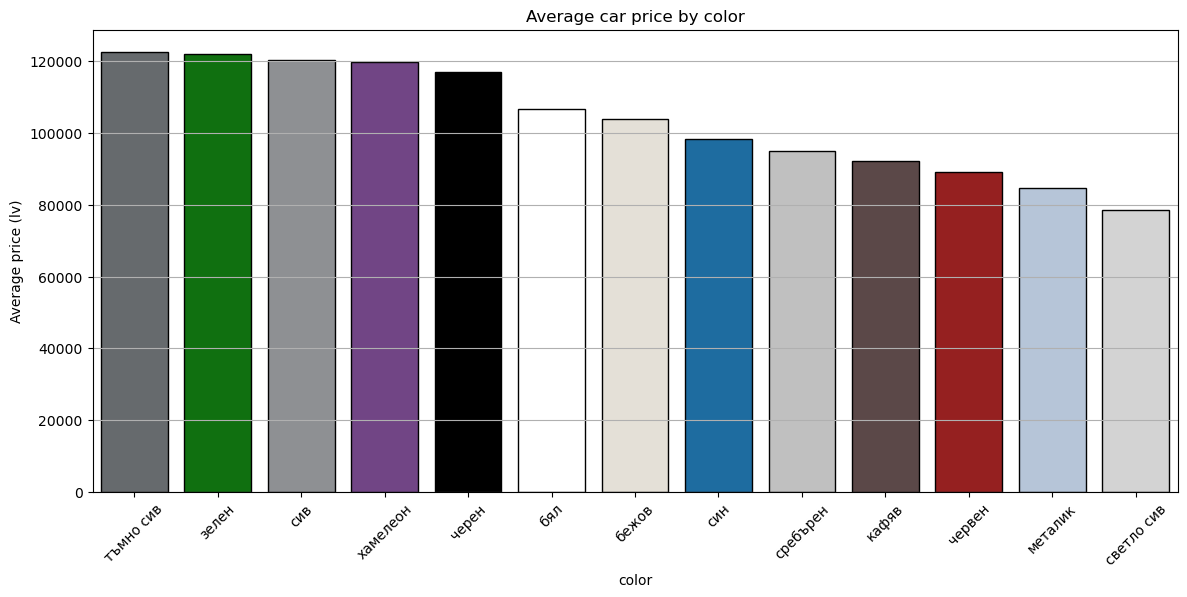

In [18]:
bar_colors = [color_mapping.get(color, ["unknown", "#808080"])[1] for color in color_mean_price["color"]]

plt.figure(figsize = (14, 6))
sns.barplot(x = "color", y = "price", hue = "color", data = color_mean_price, palette = bar_colors, edgecolor="black")

plt.title("Average car price by color")
plt.ylabel("Average price (lv)")
plt.xlabel("color")
plt.xticks(rotation = 45)
plt.grid(axis = "y")
plt.show()

In [19]:
data.drop(columns = ["color"], inplace = True)
data.rename(columns = {"color_en": "color"}, inplace = True)

In [20]:
data.color.unique()

array(['black', 'white', 'blue', 'gray', 'silver', 'brown', 'light gray',
       'dark gray', 'green', 'red', 'beige', 'metallic', 'chameleon'],
      dtype=object)

In [21]:
data.fuel.value_counts()

fuel
дизелов           407
бензинов          300
plug-in хибрид     41
хибриден           12
Name: count, dtype: int64

Translate fuel types in English:

In [22]:
map_fuels = {"дизелов": "diesel", "бензинов": "gasoline", "plug-in хибрид": "plug-in hybrid", "хибриден": "hybrid"}
data["fuel"] = data["fuel"].apply(lambda x: map_fuels[x])

In [23]:
data.fuel.unique()

array(['gasoline', 'diesel', 'plug-in hybrid', 'hybrid'], dtype=object)

I check how the prices change over the years for each type of fuel:

In [24]:
df_grouped = data.groupby(["manufacturing_year", "fuel"])["price"].mean().reset_index()

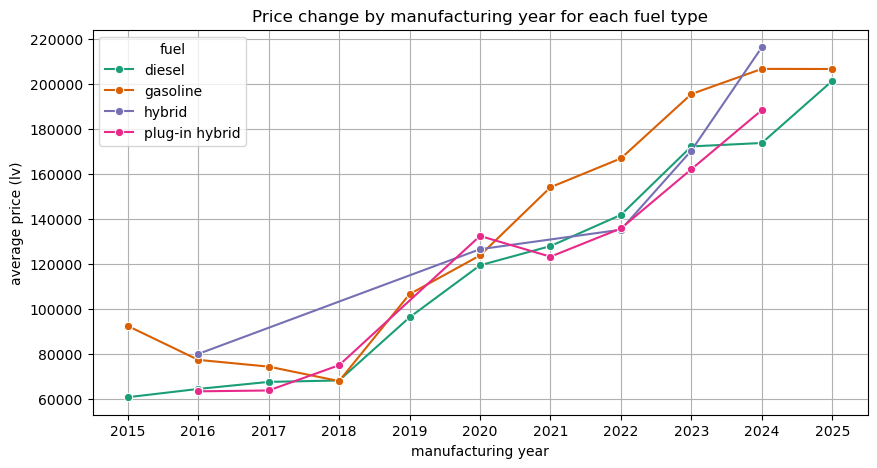

In [25]:
plt.figure(figsize = (10, 5))
sns.lineplot(x = "manufacturing_year", y = "price", hue = "fuel", data = df_grouped, marker = "o", palette = "Dark2")

plt.title("Price change by manufacturing year for each fuel type")
plt.xlabel("manufacturing year")
plt.xticks(np.arange(2015, 2026, 1))
plt.ylabel("average price (lv)")
plt.grid(True)
plt.show()

Chech the hp column:

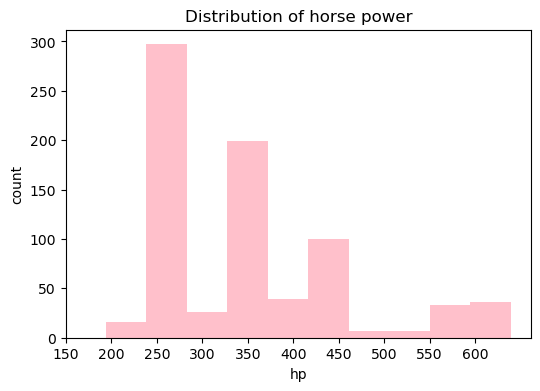

In [27]:
plt.figure(figsize = (6, 4))
plt.hist(data.hp, bins = 10, color = "pink")

plt.title("Distribution of horse power")
plt.xlabel("hp")
plt.xticks(np.arange(150, 650, 50))
plt.ylabel("count")
plt.show()

In [28]:
mean_price_by_fuel = pd.DataFrame(data.groupby("fuel")["price"].mean().reset_index())
mean_price_by_fuel

,fuel,price
0,diesel,96708.995086
1,gasoline,126385.396667
2,hybrid,164009.750000
3,plug-in hybrid,146573.731707


Translate SUV types in English:

In [30]:
map_types = {"джип": "jeep", "купе": "coupe"}
data["type"] = data["type"].apply(lambda x: map_types[x])

In [31]:
data.type.value_counts()

type
jeep     489
coupe    271
Name: count, dtype: int64

In [32]:
data.groupby("type")["price"].mean()

type
coupe    118222.324723
jeep     108825.296524
Name: price, dtype: float64

GLE coupe is 10000lv more expensive than the GLE jeep.

In [33]:
map_regions = {
    "софия": "sofia",
    "пазарджик": "pazardzhik",
    "пловдив": "plovdiv",
    "бургас": "burgas",
    "габрово": "gabrovo",
    "хасково": "haskovo",
    "велико търново": "veliko tarnovo",
    "стара загора": "stara zagora",
    "плевен": "pleven",
    "перник": "pernik",
    "шумен": "shumen",
    "варна": "varna",
    "русе": "ruse",
    "дупница": "dupnitsa",
    "кюстендил": "kyustendil",
    "сливен": "sliven",
    "смолян": "smolyan",
    "благоевград": "blagoevgrad",
    "враца": "vratsa",
    "кърджали": "kardzhali",
    "разград": "razgrad",
    "добрич": "dobrich",
    "видин": "vidin",
    "търговище": "targovishte",
    "ямбол": "yambol"
}
data["region"] = data["region"].apply(lambda x: map_regions[x])

Check the prices by regions:

In [34]:
region_mean_price = pd.DataFrame(data.groupby("region")["price"].mean().sort_values(ascending = False)).reset_index()

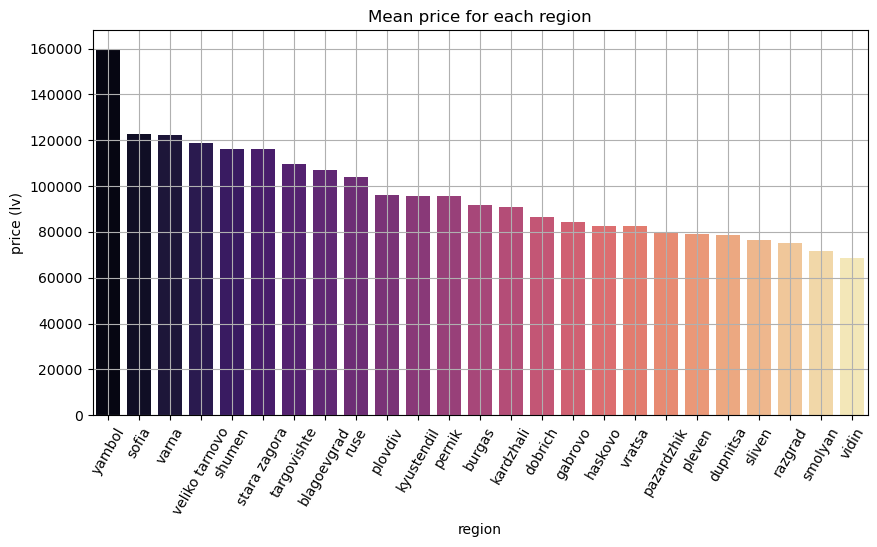

In [35]:
plt.figure(figsize = (10, 5))
sns.barplot(x = "region", y = "price", data = region_mean_price, hue = "region", palette = "magma")

plt.title("Mean price for each region")
plt.xlabel("region")
plt.xticks(rotation = 60)
plt.ylabel("price (lv)")
plt.grid(True)
plt.show()

In [36]:
data.is_amg.value_counts()

is_amg
1    530
0    230
Name: count, dtype: int64

In [37]:
mean_price_amg = data[data.is_amg == 1].price.mean()
mean_price_without_amg = data[data.is_amg == 0].price.mean()
print(f"Cars with AMG pack or tuning have average price = {mean_price_amg:.2f}lv")
print(f"Cars without AMG have average price = {mean_price_without_amg:.2f}lv")

Cars with AMG pack or tuning have average price = 114608.93lv
Cars without AMG have average price = 106569.94lv


In [38]:
mean_mileage_year = pd.DataFrame(data.groupby("manufacturing_year")["mileage"].mean())
mean_mileage_year

,mileage
manufacturing_year,
2015,172852.972973
2016,174909.207143
2017,167049.656863
2018,149289.588235
2019,120125.675000
2020,103026.882353
2021,90733.967033
2022,60862.780488
2023,22754.120000


The change in price and mileage over the years:

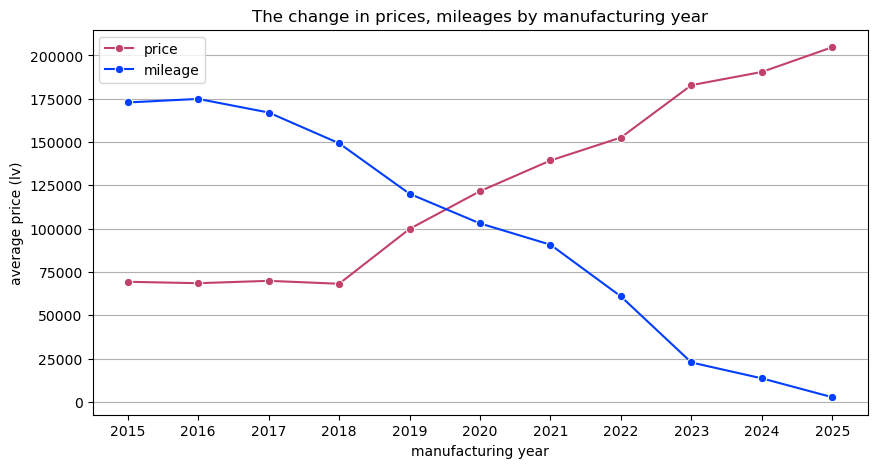

In [39]:
plt.figure(figsize = (10, 5))
sns.lineplot(mean_price_by_year, marker = "o", palette = "flare")
sns.lineplot(mean_mileage_year, marker = "o", palette = "bright")

plt.title("The change in prices, mileages by manufacturing year")
plt.xlabel("manufacturing year")
plt.xticks(np.arange(2015, 2026, 1))
plt.ylabel("average price (lv)")
plt.grid(axis = "y")
plt.show()

In [58]:
current_year = datetime.now().year

In [61]:
data["age"] = current_year - data["manufacturing_year"]

In [63]:
data.age.value_counts()

age
9     140
8     102
5     102
4      91
2      75
7      68
1      58
3      41
6      40
10     37
0       6
Name: count, dtype: int64

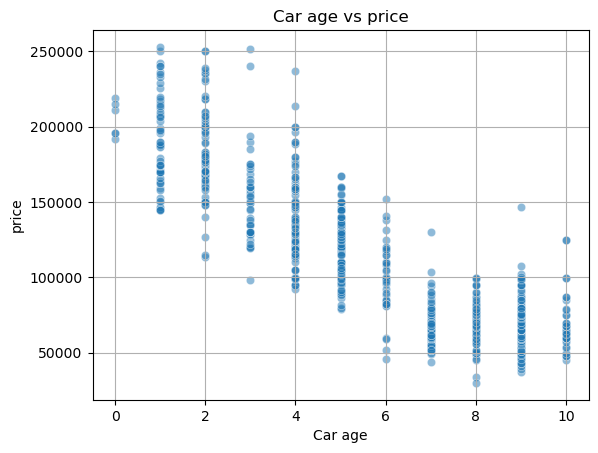

In [65]:
sns.scatterplot(x = data.age, y = data.price, alpha = 0.5)

plt.xlabel("Car age")
plt.ylabel("price")
plt.title("Car age vs price")
plt.grid()
plt.show()

In [67]:
data.drop(columns = ["manufacturing_year"], inplace = True)

### Correlation matrix for numerical columns:

In [68]:
num_data = data.corr(numeric_only = True)

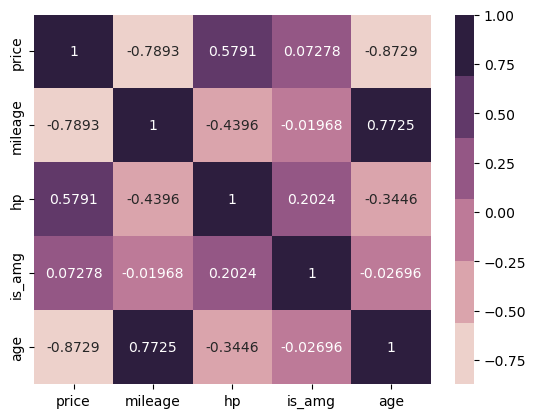

In [69]:
sns.heatmap(num_data, cmap = sns.cubehelix_palette(), annot = True, fmt='.4g')
plt.show()

In [70]:
data = data.drop(columns = ['url'])

In [72]:
data.head()

,title,price,mileage,fuel,hp,type,region,is_amg,color,age
0,mercedes-benz gle 450amg coupe дистроник камер...,69990,153000,gasoline,367.0,coupe,sofia,1,black,9
1,mercedes-benz gle 350d coupe-amg line-9g-troni...,69999,189000,diesel,258.0,coupe,pazardzhik,1,white,8
2,mercedes-benz gle 43 amg coupe панорама дистр....,78990,127000,gasoline,367.0,coupe,sofia,1,blue,8
3,mercedes-benz gle 250 d,45500,178000,diesel,204.0,jeep,plovdiv,0,black,10
4,mercedes-benz gle 350 4matic amg * топ състояние*,46000,251700,gasoline,307.0,jeep,sofia,1,gray,9


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 760 entries, 0 to 762
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    760 non-null    object 
 1   price    760 non-null    int64  
 2   mileage  760 non-null    int64  
 3   fuel     760 non-null    object 
 4   hp       760 non-null    float64
 5   type     760 non-null    object 
 6   region   760 non-null    object 
 7   is_amg   760 non-null    int64  
 8   color    760 non-null    object 
 9   age      760 non-null    int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 65.3+ KB


In [74]:
current_date = datetime.today().strftime('%d-%m-%Y')
filename = f"data/analysed_data_{current_date}.csv"
data.to_csv(filename, index = False)